# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Read in Data
flight = pd.read_csv("flight.csv")
flight.head()


,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


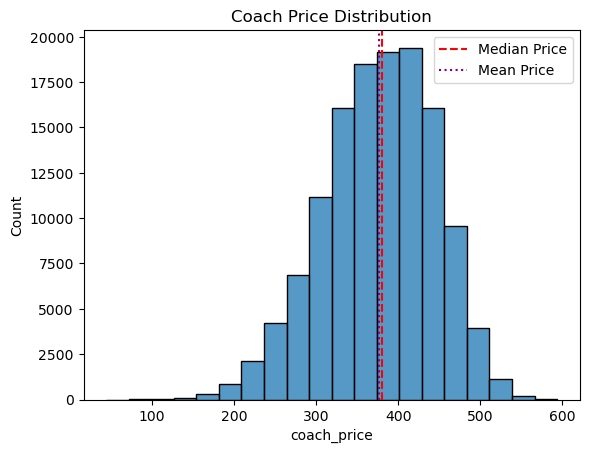

Median coach_price: 380.56
Mean coach_price: 376.58525308213905
Answer: $500 is far higher than median and mean price


<Figure size 640x480 with 0 Axes>

In [2]:
## Task 1
sns.histplot(flight.coach_price, bins=20)
plt.axvline(np.median(flight.coach_price), c='r', ls='dashed', label='Median Price')
plt.axvline(np.mean(flight.coach_price), c='purple', ls='dotted', label='Mean Price')
plt.title('Coach Price Distribution')
plt.legend()
plt.show()
plt.clf()

print('Median coach_price:',np.median(flight.coach_price))
print('Mean coach_price:',np.mean(flight.coach_price))
print('Answer: $500 is far higher than median and mean price')

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


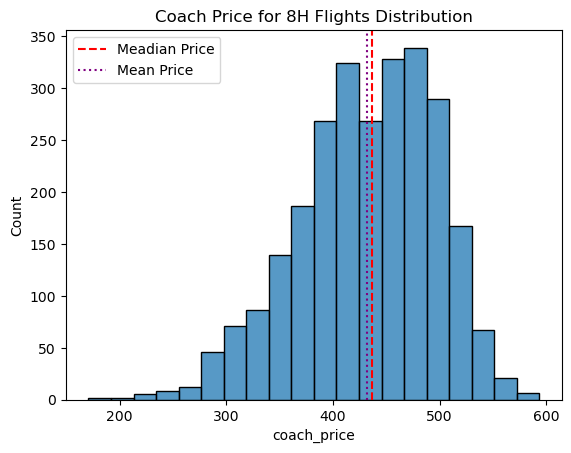

Median coach_price 8h: 437.115
Mean coach_price 8h: 431.834377372817
Answer: $500 for 8h flights seems to be more closer to median and mean price, but still higher than average price


<Figure size 640x480 with 0 Axes>

In [3]:
## Task 2
flight_8h = flight[flight.hours == 8]
plt.axvline(np.median(flight_8h.coach_price), c='red', ls='dashed', label='Meadian Price')
plt.axvline(np.mean(flight_8h.coach_price), c='purple', ls='dotted', label='Mean Price')
sns.histplot(flight_8h.coach_price, bins=20)
plt.title('Coach Price for 8H Flights Distribution')
plt.legend()
plt.show()
plt.clf()

print('Median coach_price 8h:',np.median(flight_8h.coach_price))
print('Mean coach_price 8h:',np.mean(flight_8h.coach_price))
print('Answer: $500 for 8h flights seems to be more closer to median and mean price, but still higher than average price')

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [4]:
plt?

Type:        module
String form: <module 'matplotlib.pyplot' from '/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/matplotlib/pyplot.py'>
File:        ~/anaconda3/envs/myenv/lib/python3.11/site-packages/matplotlib/pyplot.py
Docstring:  
`matplotlib.pyplot` is a state-based interface to matplotlib. It provides
an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
screen, and acts as the figure GUI manager.

pyplot is mainly intended for interactive plots and simple cases of
programmatic plot generation::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    plt.plot(x, y)

The explicit object-oriented API is recommended for complex plots, though
pyplot is still usually used to create the figure and often the axes in the
figure. See `.pyplot.figure`, `.pyplot.subplots`, and
`.pyplot.subplot_mosaic` to create figures, and
:doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::

    

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


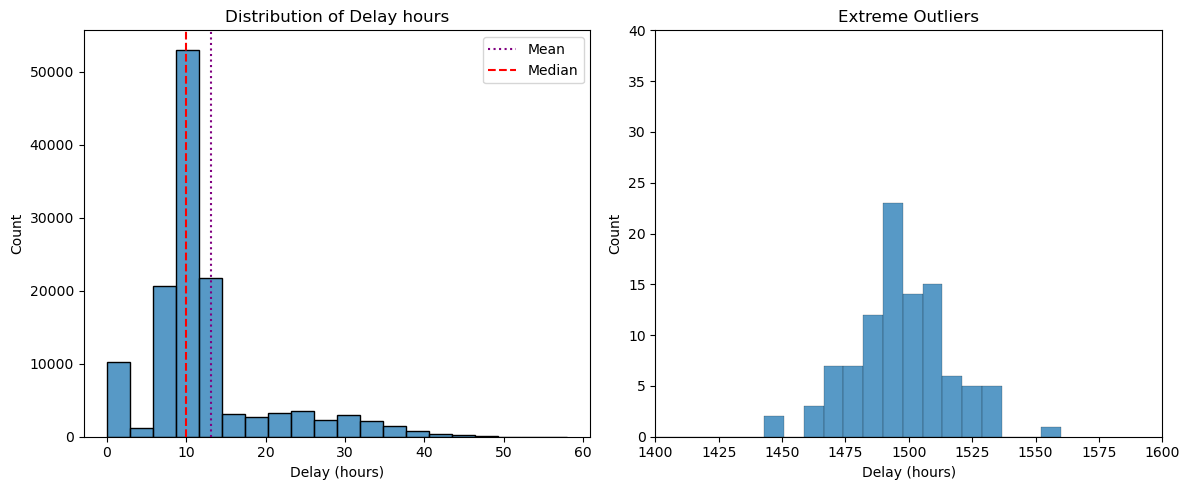

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64
Outliers datapoints longer than 200h delay: 100
Answer: We can see that a 10-minute delay is fairly common for this airline. You will want to keep that in consideration when setting up a connecting flight


<Figure size 640x480 with 0 Axes>

In [5]:
## Task 3
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(flight.delay[flight.delay < 200], bins=20)
plt.axvline(np.mean(flight.delay), c='purple', label='Mean', ls='dotted')
plt.axvline(np.median(flight.delay), c='r', label='Median', ls='dashed')
plt.xlabel('Delay (hours)')
plt.ylabel('Count')
plt.title('Distribution of Delay hours')
plt.legend()

# outliers
ax = plt.subplot(1,2,2)
sns.histplot(flight.delay, bins=200)
plt.axis([1400,1600, 0, 40])
plt.xlabel('Delay (hours)')
plt.ylabel('Count')
plt.title('Extreme Outliers')
plt.subplots_adjust(wspace=0.2)

plt.tight_layout() 
plt.show(); plt.clf()


print(flight.delay.describe())
print('Outliers datapoints longer than 200h delay:', flight.delay[flight.delay > 200].size)
print('Answer: We can see that a 10-minute delay is fairly common for this airline. You will want to keep that in consideration when setting up a connecting flight')

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

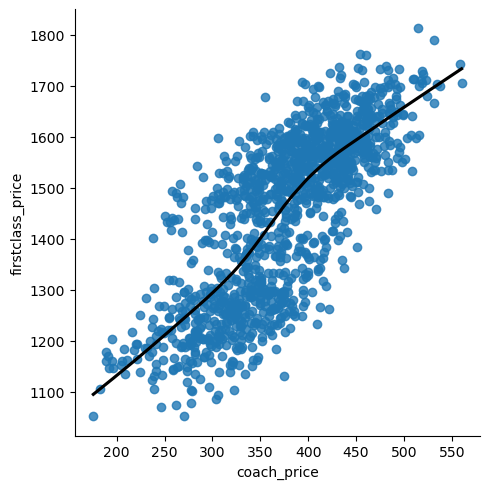

<Figure size 640x480 with 0 Axes>

In [6]:
## Task 4
# random sampling of pupulation datasaet
perc = 0.01
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

# sns.scatterplot(x='coach_price', y='firstclass_price', data=flight, alpha=.3)
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, line_kws={'color': 'black'}, lowess=True)

plt.show(); plt.clf()


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


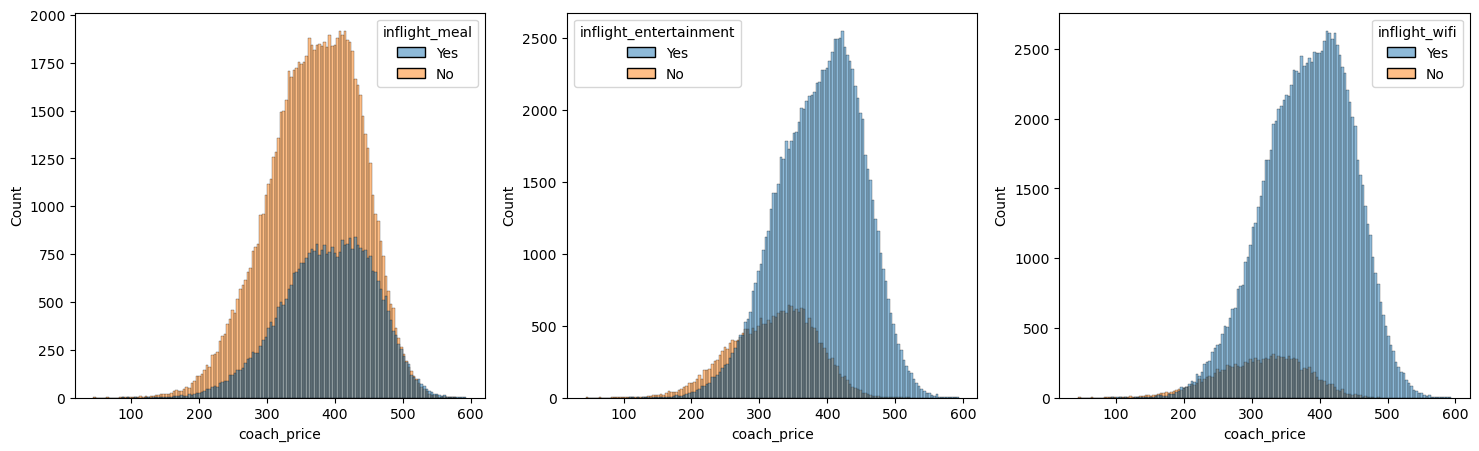

In [7]:
## Task 5
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(flight, x='coach_price', hue=flight.inflight_meal, hue_order=['Yes', 'No'])

plt.subplot(1,3,2)
sns.histplot(flight, x='coach_price', hue=flight.inflight_entertainment)

plt.subplot(1,3,3)
sns.histplot(flight, x='coach_price', hue=flight.inflight_wifi)

plt.show(); plt.clf(); plt.close()


6. How does the number of passengers change in relation to the length of flights?

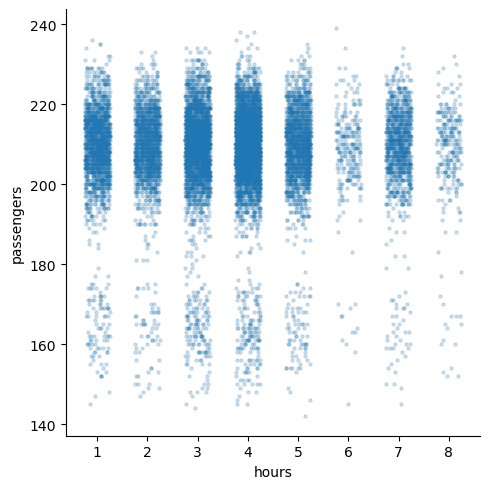

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 6
flight_sub = flight.sample(n = int(flight.shape[0]*0.1))
# sns.scatterplot(data=flight_sub, x='hours', y='passengers')
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show(); plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

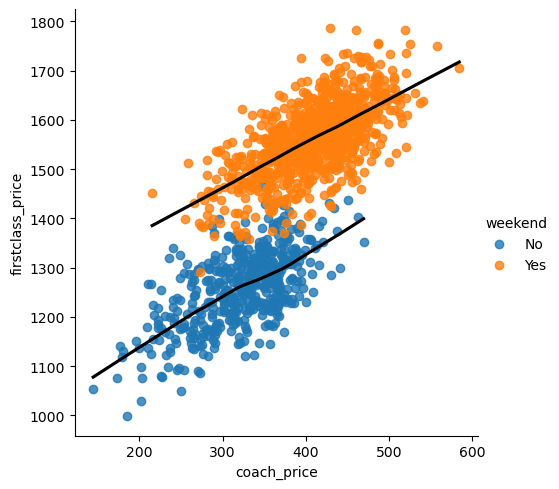

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 7
flight_sub = flight.sample(n = int(flight.shape[0]*0.01))
sns.lmplot(data=flight_sub, x='coach_price', y='firstclass_price', hue='weekend', fit_reg=True, line_kws={'color': 'black'}, lowess=True)

plt.show(); plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

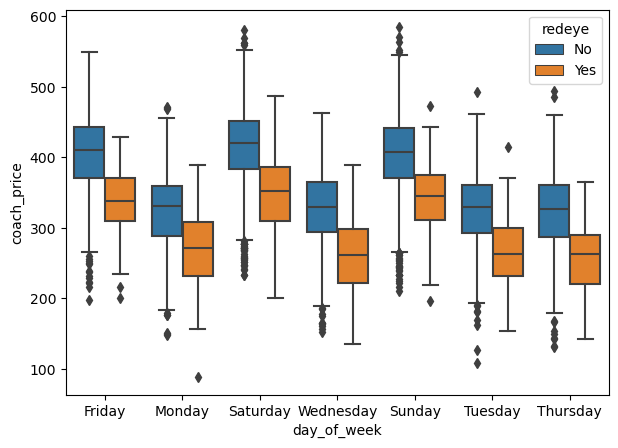

<Figure size 640x480 with 0 Axes>

In [10]:
## Task 8
plt.figure(figsize=(7, 5))
flight_sub = flight.sample(n = int(flight.shape[0]*0.1))
sns.boxplot(data=flight_sub, x='day_of_week', y='coach_price', hue='redeye')

plt.show(); plt.clf()
